<a href="https://colab.research.google.com/github/Edersao/Atmosf-ricos/blob/main/Grace_Merida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lectura de datos NetCDF del satelite Grace.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install netCDF4
# paqueterias a utilizar
######
#!pip show mpl_toolkits.basemap # para ver si estan instaladas en Colab
#!pip install mpl_toolkits.basemap
!pip install basemap
#!pip show matplotlib.pyplot
#!pip install matplotlib.pyplot # según esto es la misma paquetería que matplotlib
#datetime
!pip install datetime

Lectura de datos netCDF y paqueterias:

In [5]:
#import netCDF4 as nc
from netCDF4 import Dataset
import datetime as dt  # Incluiremos la librería datetime
import numpy as np
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid
archivo = '/content/drive/MyDrive/Data Scientist/Ixil/Ixil/datos mensuales/2012/g4.timeAvgMap.GLDAS_CLSM025_DA1_D_2_2_GWS_tavg.20120101-20120131.90W_18N_86W_22N.nc'
nc_fid= Dataset(archivo)

In [ ]:
def ncdump(nc_fid, verb=True):
    '''
    ncdump extrae dimensiones, variables e información de atributos.
    La información que se extrae es muy similar que usando ncdump (NCAR) .
    ncdump requiere una instancia válida del dataset a usar.

    Parámetros:
    ----------
    nc_fid : netCDF4.Dataset
        A netCDF4 dateset object
    verb : Boolean
        whether or not nc_attrs, nc_dims, and nc_vars are printed

    Returns
    -------
    nc_attrs : list
        A Python list of the NetCDF file global attributes
    nc_dims : list
        A Python list of the NetCDF file dimensions
    nc_vars : list
        A Python list of the NetCDF file variables
    '''
    def print_ncattr(key):
        """
        Prints the NetCDF file attributes for a given key

        Parameters
        ----------
        key : unicode
            a valid netCDF4.Dataset.variables key
        """
        try:
            print ("\t\ttype:", repr(nc_fid.variables[key].dtype))
            for ncattr in nc_fid.variables[key].ncattrs():
                print ('\t\t%s:' % ncattr,\
                      repr(nc_fid.variables[key].getncattr(ncattr)))
        except KeyError:
            print ("\t\tWARNING: %s does not contain variable attributes" % key)

    # Atributos globales del archivo NetCDF
    nc_attrs = nc_fid.ncattrs()
    if verb:
        print ("NetCDF Global Attributes:")
        for nc_attr in nc_attrs:
            print ('\t%s:' % nc_attr, repr(nc_fid.getncattr(nc_attr)))
    nc_dims = [dim for dim in nc_fid.dimensions]  # list of nc dimensions
    # información geoespacial.
    if verb:
        print ("NetCDF dimension information:")
        for dim in nc_dims:
            print ("\tName:", dim )
            print ("\t\tsize:", len(nc_fid.dimensions[dim]))
            print_ncattr(dim)
    # Información de variables.
    nc_vars = [var for var in nc_fid.variables]  # list of nc variables
    if verb:
        print ("NetCDF variable information:")
        for var in nc_vars:
            if var not in nc_dims:
                print ('\tName:', var)
                print ("\t\tdimensions:", nc_fid.variables[var].dimensions)
                print ("\t\tsize:", nc_fid.variables[var].size)
                print_ncattr(var)
    return nc_attrs, nc_dims, nc_vars


                             # y crearemos la instancia del tipo ncCDF4
nc_attrs, nc_dims, nc_vars = ncdump(nc_fid)

Vemos los nombres de las variables que tiene el archivo

In [18]:
nc_fid.variables.keys()

dict_keys(['GLDAS_CLSM025_DA1_D_2_2_GWS_tavg', 'lat', 'lat_bnds', 'lon', 'lon_bnds'])

Para observar las dinsiones de cada una de las variables

In [20]:
for d in nc_fid.dimensions.items():
  print(d)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 15)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 15)
('latv', <class 'netCDF4._netCDF4.Dimension'>: name = 'latv', size = 2)
('lonv', <class 'netCDF4._netCDF4.Dimension'>: name = 'lonv', size = 2)


Vamos a ver los datos mensuales del archivo

In [ ]:
mens_grace=nc_fid.variables['GLDAS_CLSM025_DA1_D_2_2_GWS_tavg']
print(mens_grace)

In [28]:
print('dimensiones: ',mens_grace.dimensions,'shape:',mens_grace.shape,sep='\n')

dimensiones: 
('lat', 'lon')
shape:
(15, 15)


el tiempo del archivo

In [51]:
#dt.datetime.fromisoformat(nc_fid.getncattr(nc_attrs[1]))
#di=dt.datetime.fromisoformat(nc_fid.getncattr(nc_attrs[1])[:-1] + '+00:00')
di = dt.datetime.fromisoformat(
    nc_fid.getncattr(nc_attrs[1])[:-1]).astimezone(dt.timezone.utc)
df = dt.datetime.fromisoformat(
    nc_fid.getncattr(nc_attrs[2])[:-1]).astimezone(dt.timezone.utc)
print('día de inicio:',di.strftime('%Y-%m-%d %H:%M:%S'),'día final:',df.strftime('%Y-%m-%d %H:%M:%S'))


día de inicio: 2012-01-01 00:00:00 día final: 2012-02-01 00:00:00


# Intento de gráfica

primero extraemos los datos

In [89]:
nc_fid.ncattrs()
nc_fid.getncattr('plot_hint_title')

'Time Averaged Map of Ground water storage daily 0.25 deg. [GLDAS Model GLDAS_CLSM025_DA1_D v2.2] mm'

<ipython-input-90-ff6fee511073>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap=plt.cm.get_cmap('gist_rainbow')


Text(0.5, 1.0, 'Time Averaged Map of Ground water storage daily 0.25 deg. [GLDAS Model GLDAS_CLSM025_DA1_D v2.2] mm')

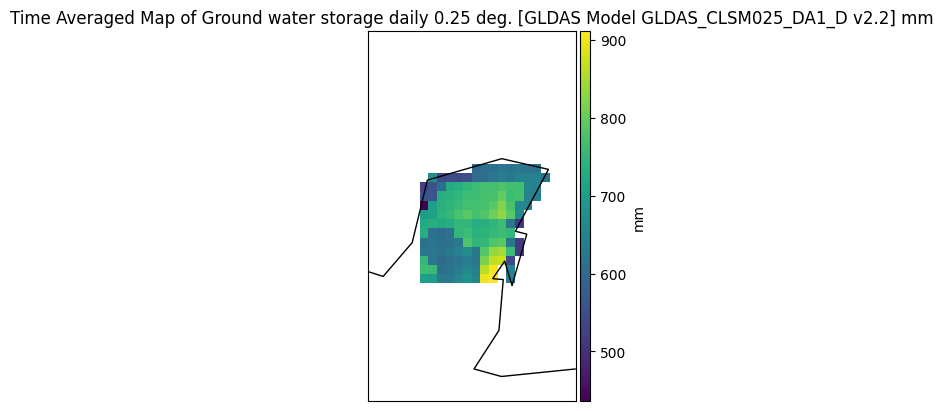

In [90]:
data = mens_grace[:]
unidad = mens_grace.getncattr('units')
lat = nc_fid.variables['lat'][:]
lon = nc_fid.variables['lon'][:]

m = Basemap(projection='merc',llcrnrlat=15,urcrnrlat=25,\
            llcrnrlon=-92,urcrnrlon=-86,lat_ts=10,resolution='c')
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
#m.drawmapboundary(fill_color='aqua')
my_cmap=plt.cm.get_cmap('gist_rainbow')
my_cmap.set_under('w')
x, y = m(lon, lat)
m.pcolormesh(x, y, data)
cb = m.colorbar()
cb.set_label(unidad)
plt.title(nc_fid.getncattr('plot_hint_title'))

mpl_toolkits.basemap